### Import Required Libraries

In [70]:
import pandas as pd
import numpy as np

### Read Data
- Load and read CSV file into dataset.

In [71]:
car=pd.read_csv("CarPrice_Assignment.csv")
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Check the shape of data
- 205 rows and 26 columns are present in the data

In [72]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [36]:
car.shape

(205, 26)

### Check data Information
- there are no null values present in any of the column.
- 10 categorical columns and 16 numerical columns are present.


In [37]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Check duplicates 
- There are no duplicates values present in the data

In [38]:
car.duplicated().sum()

0

In [39]:
car["carbrand"]=car["CarName"].str.split(" ").str[0]
car["carmodel"]=car["CarName"].str.split(" ").str[-1]
car.drop(columns=["CarName","car_ID","symboling"], inplace=True)

### Outlier Detection:
- After analyzing the numerical columns, it was found that there are not many outliers present.
- The Compressionratio column has the highest number of outliers, totaling 28, followed by the Stroke column.
- The remaining numerical columns each contain fewer than 20 outliers.

In [40]:
for i in car.columns[:-1]:
    if car[i].dtype==object:
        continue
    else:
        q1=car[i].quantile(0.25)
        q3=car[i].quantile(0.75)
        IQR=q3-q1
        lower=q1-(1.5*IQR)
        upper=q3+(1.5*IQR)
        print(i,len(car[(car[i]<lower) | (car[i]>upper)]))
        car.loc[(car[i]<lower) | (car[i]>upper),i]=car[i].median()
        print(len(car[(car[i]<lower) | (car[i]>upper)]))

wheelbase 3
0
carlength 1
0
carwidth 8
0
carheight 0
0
curbweight 0
0
enginesize 10
0
boreratio 0
0
stroke 20
0
compressionratio 28
0
horsepower 6
0
peakrpm 2
0
citympg 2
0
highwaympg 3
0
price 15
0


- summary of statistics such as mean, min, max, standard deviation, 25, 50,75 percentile for all numerical columns

In [41]:
car.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.458537,174.205854,65.665854,53.724878,2555.565854,120.326829,3.329756,3.29400,8.929854,100.209756,5111.463415,24.985366,30.424390,11420.542278
std,5.570721,12.118818,1.797331,2.443522,520.680204,28.356891,0.270844,0.20071,0.524056,32.591047,453.934655,6.136901,6.358597,4792.790228
min,86.600000,144.600000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.68000,7.500000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.800000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.15000,8.700000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.29000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,101.200000,183.100000,66.500000,55.500000,2935.000000,136.000000,3.580000,3.40000,9.300000,116.000000,5500.000000,30.000000,34.000000,14399.000000
max,114.200000,208.100000,70.900000,59.800000,4066.000000,203.000000,3.940000,3.86000,10.100000,184.000000,6000.000000,45.000000,47.000000,28248.000000


### Find Correlation
- finding correlation is going to helps in selecting independent features and dependent variable
- Identify the features which shows correlation with the target variable
- By selecting mostly correlated features model's accuracy will be increased.

In [42]:
car.select_dtypes(include="number").corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.802791,0.759385,0.575718,0.709540,0.411294,0.468816,0.191453,-0.259975,0.462695,-0.317521,-0.394776,-0.458186,0.600212
carlength,0.802791,1.000000,0.742454,0.497092,0.866930,0.554889,0.597264,0.109550,-0.286927,0.647109,-0.294251,-0.631713,-0.673481,0.616798
carwidth,0.759385,0.742454,1.000000,0.247624,0.807316,0.588676,0.570168,0.181258,-0.225878,0.611453,-0.222755,-0.566680,-0.594373,0.677243
carheight,0.575718,0.497092,0.247624,1.000000,0.295572,0.114354,0.171071,0.058287,-0.138373,0.037162,-0.322762,-0.024002,-0.095205,0.245636
curbweight,0.709540,0.866930,0.807316,0.295572,1.000000,0.700681,0.648480,0.112691,-0.308768,0.759879,-0.263906,-0.737446,-0.781422,0.668116
enginesize,0.411294,0.554889,0.588676,0.114354,0.700681,1.000000,0.596687,0.180810,-0.057723,0.586237,-0.211304,-0.565932,-0.550697,0.666140
boreratio,0.468816,0.597264,0.570168,0.171071,0.648480,0.596687,1.000000,-0.013770,-0.148195,0.528771,-0.257903,-0.563709,-0.560246,0.440439
stroke,0.191453,0.109550,0.181258,0.058287,0.112691,0.180810,-0.013770,1.000000,-0.172075,0.125932,-0.195004,0.005958,-0.045469,0.079198
compressionratio,-0.259975,-0.286927,-0.225878,-0.138373,-0.308768,-0.057723,-0.148195,-0.172075,1.000000,-0.364386,0.154554,0.373079,0.391439,-0.135462
horsepower,0.462695,0.647109,0.611453,0.037162,0.759879,0.586237,0.528771,0.125932,-0.364386,1.000000,0.034263,-0.803629,-0.806949,0.595358


## Univariate Analysis
- In univariate analysis, nalyze each variable by plotting various charts such as histograms, boxplots, KDE plots, and quantile-quantile (QQ) plots, along with statistical values like mean, median, min, max, standard deviation, and skewness to understand the spread and distribution of the data.

- split columns
1. numerical 16
2. categorical 10

In [43]:
numeric_columns=car.select_dtypes(include="number").columns.tolist()
categorical_columns=car.select_dtypes(include=["object"]).columns.tolist()
print(categorical_columns)
print()
print(numeric_columns)

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'carbrand', 'carmodel']

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


## numerical columns

- import necessary libraries to plot graphs

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

- Non-visual representation of numerical columns, along with standard deviation and skewness, helps highlight the spread of data and the direction of skewness.
- The data's spread is well understood through the standard deviation, while skewness values reveal whether the data is skewed to the left or right.

In [45]:
for i in numeric_columns:
    print(car[i].agg(["mean","min","max","std","skew"]))

mean     98.458537
min      86.600000
max     114.200000
std       5.570721
skew      0.903744
Name: wheelbase, dtype: float64
mean    174.205854
min     144.600000
max     208.100000
std      12.118818
skew      0.224884
Name: carlength, dtype: float64
mean    65.665854
min     60.300000
max     70.900000
std      1.797331
skew     0.610652
Name: carwidth, dtype: float64
mean    53.724878
min     47.800000
max     59.800000
std      2.443522
skew     0.063123
Name: carheight, dtype: float64
mean    2555.565854
min     1488.000000
max     4066.000000
std      520.680204
skew       0.681398
Name: curbweight, dtype: float64
mean    120.326829
min      61.000000
max     203.000000
std      28.356891
skew      0.803060
Name: enginesize, dtype: float64
mean    3.329756
min     2.540000
max     3.940000
std     0.270844
skew    0.020156
Name: boreratio, dtype: float64
mean    3.294000
min     2.680000
max     3.860000
std     0.200710
skew   -0.138569
Name: stroke, dtype: float64
mean     8.

- Histograms with KDE for all numerical columns show that price, wheelbase, and curbweight are right-skewed, while carlength, carheight, and highwaympg have a normal distribution.
- The right-skewed features might need some adjustments, while the normally distributed ones are already in good shape for analysis.

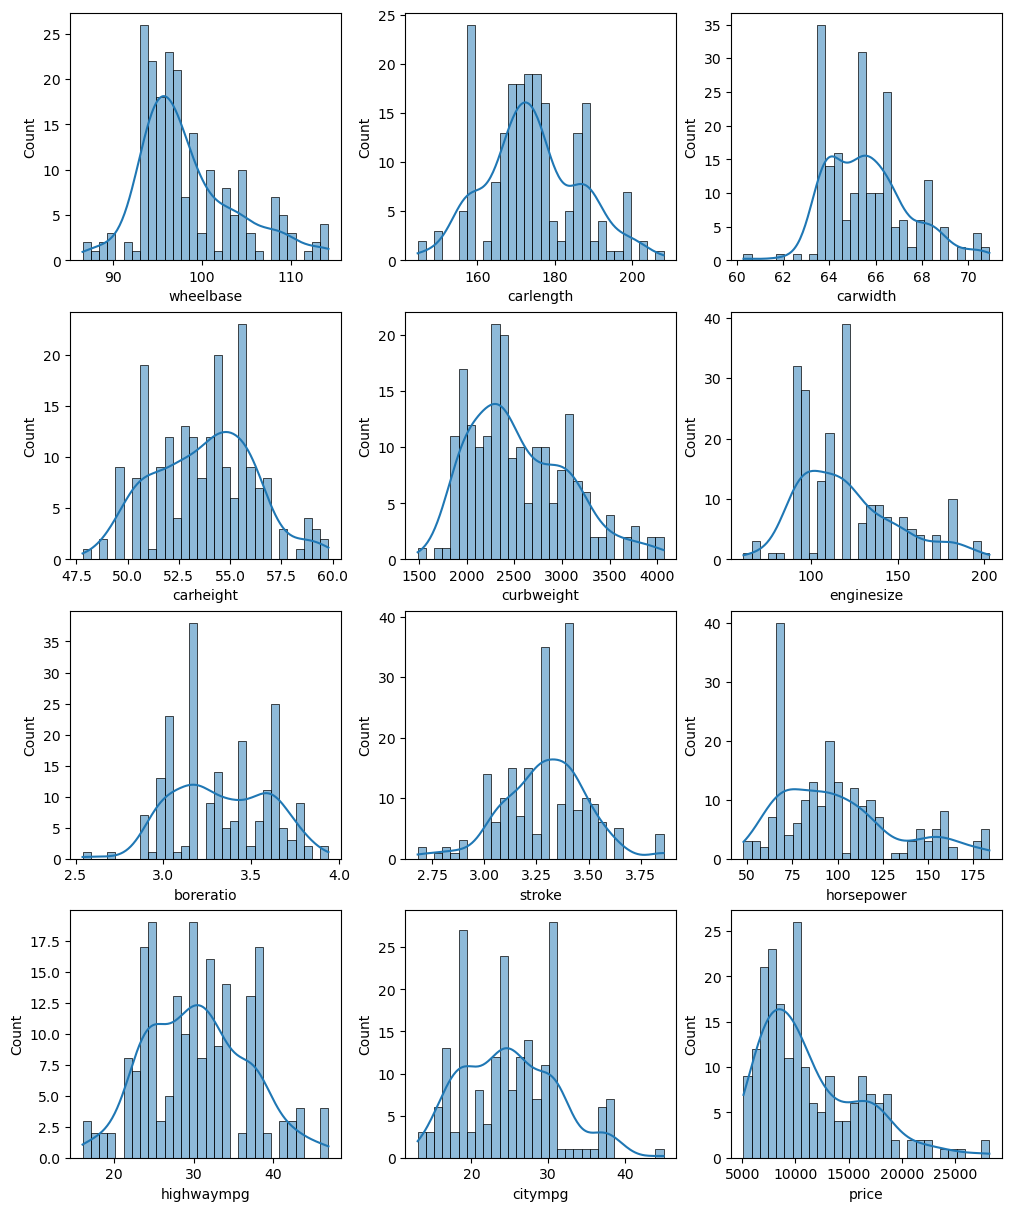

In [46]:
plt.figure(figsize=(10,12), layout="constrained")
plt.subplot(4,3,1)
sns.histplot(x=car["wheelbase"], kde=True, bins=30)
plt.subplot(4,3,2)
sns.histplot(x=car["carlength"], kde=True, bins=30)
plt.subplot(4,3,3)
sns.histplot(x=car["carwidth"], kde=True, bins=30)
plt.subplot(4,3,4)
sns.histplot(x=car["carheight"], kde=True, bins=30)
plt.subplot(4,3,5)
sns.histplot(x=car["curbweight"], kde=True, bins=30)
plt.subplot(4,3,6)
sns.histplot(x=car["enginesize"], kde=True, bins=30)
plt.subplot(4,3,7)
sns.histplot(x=car["boreratio"], kde=True, bins=30)
plt.subplot(4,3,8)
sns.histplot(x=car["stroke"], kde=True, bins=30)
plt.subplot(4,3,9)
sns.histplot(x=car["horsepower"], kde=True, bins=30)
plt.subplot(4,3,10)
sns.histplot(x=car["highwaympg"], kde=True, bins=30)
plt.subplot(4,3,11)
sns.histplot(x=car["citympg"], kde=True, bins=30)
plt.subplot(4,3,12)
sns.histplot(x=car["price"], kde=True, bins=30)
plt.show()

- Box plot visualization for all numerical columns after addressing outliers.
- The box plot shows a more balanced distribution across numerical columns, with outliers removed to reveal clearer trends in the data.

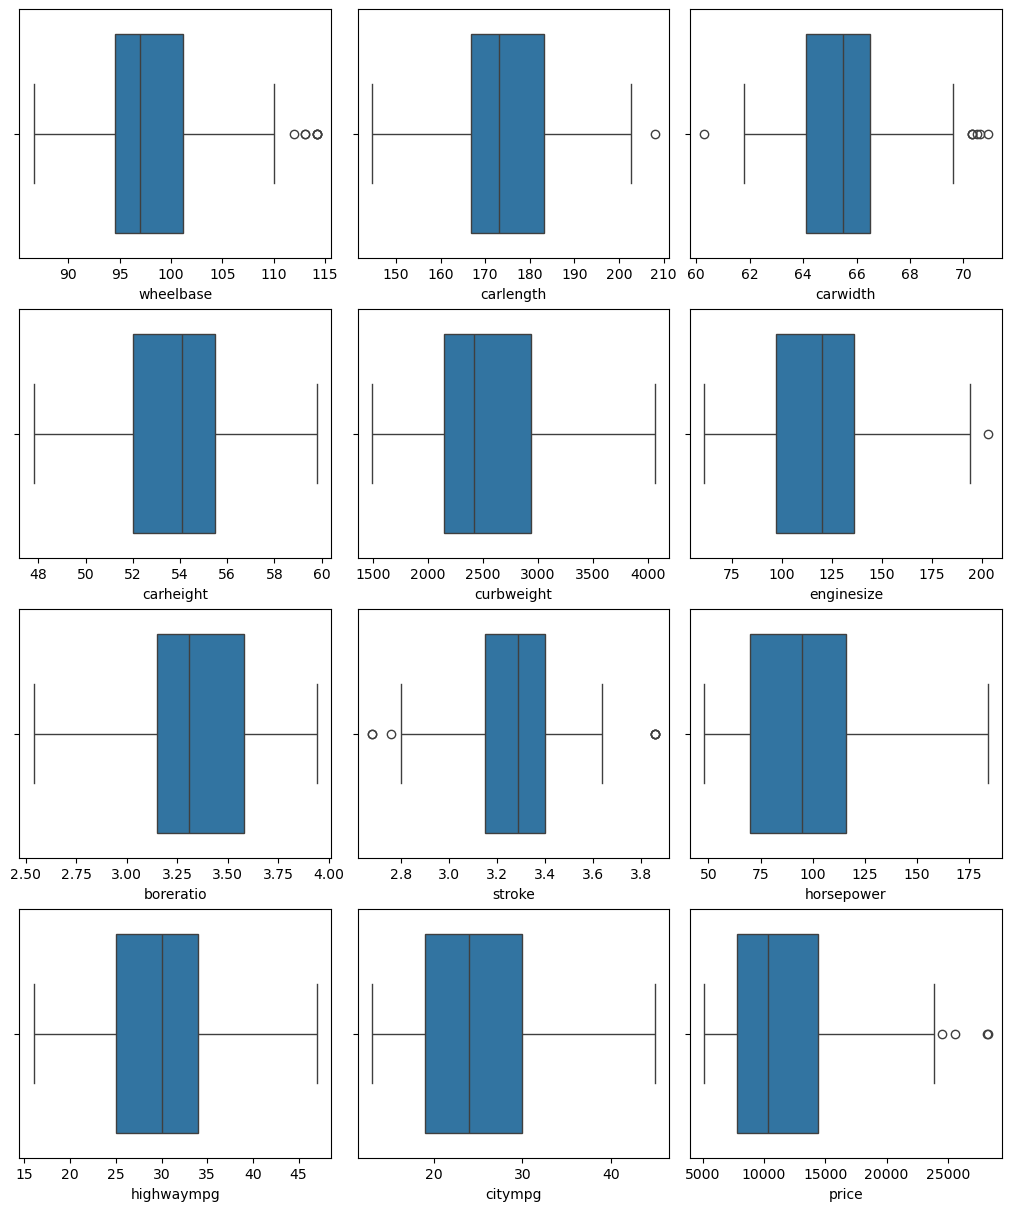

In [47]:
plt.figure(figsize=(10,12), layout="constrained")
plt.subplot(4,3,1)
sns.boxplot(x=car["wheelbase"])
plt.subplot(4,3,2)
sns.boxplot(x=car["carlength"])
plt.subplot(4,3,3)
sns.boxplot(x=car["carwidth"])
plt.subplot(4,3,4)
sns.boxplot(x=car["carheight"])
plt.subplot(4,3,5)
sns.boxplot(x=car["curbweight"])
plt.subplot(4,3,6)
sns.boxplot(x=car["enginesize"])
plt.subplot(4,3,7)
sns.boxplot(x=car["boreratio"])
plt.subplot(4,3,8)
sns.boxplot(x=car["stroke"])
plt.subplot(4,3,9)
sns.boxplot(x=car["horsepower"])
plt.subplot(4,3,10)
sns.boxplot(x=car["highwaympg"])
plt.subplot(4,3,11)
sns.boxplot(x=car["citympg"])
plt.subplot(4,3,12)
sns.boxplot(x=car["price"])
plt.show()

## categorical columns

**FuelType**
- Cars with gas 175 are more than the diesel 25

**Aspiration**
- Aspiration std 160 are more compared to turbo 30

**Doornumber**
- Cars with four doors are more than with 2 doors

**Carbody**
- Sedan carbody is more followed by hatchback, wagon and least is convertible

**Drivewheel**
- Drivewheel with fwd are more followed by rwd whereas 4wd is the least

**Enginelocation**
- Cars with enginelocation at front are most while with rear very least

**Enginetype**
- ohc enginetype is most followed by ohcf and ohcv where as least is dohcv

**Cylindernumber**
- Cars with four cylinder are more followed by six and five while three and twelve are least

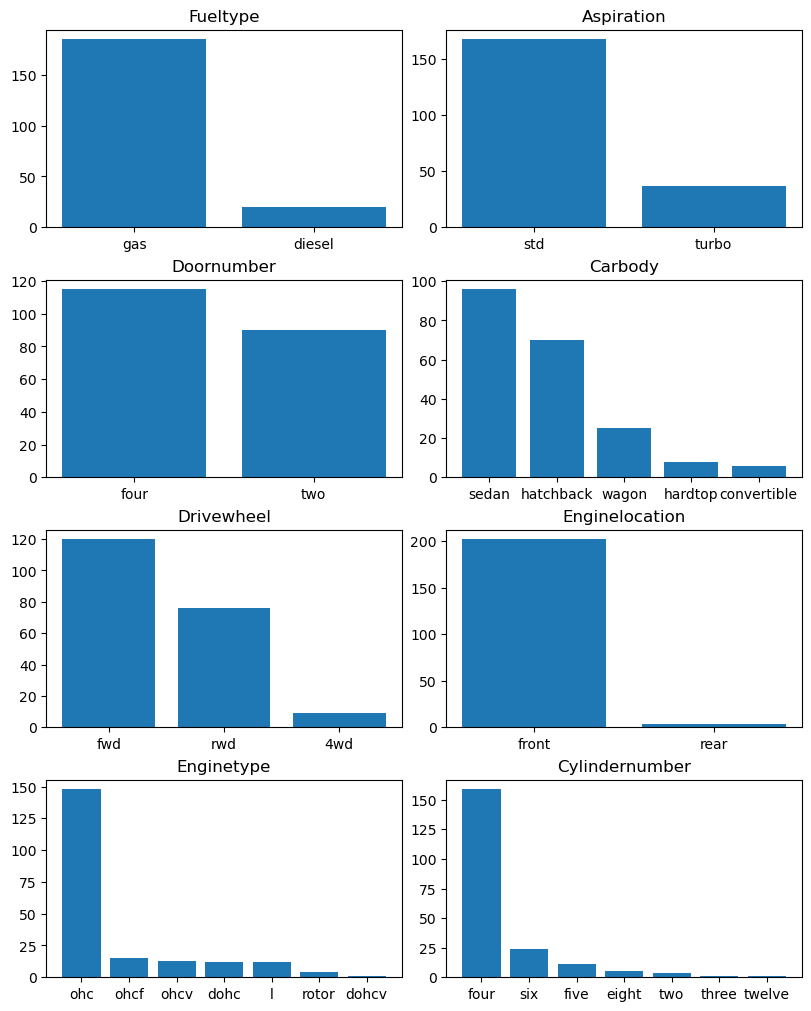

In [48]:
plt.figure(figsize=(8,10), layout="constrained")
plt.subplot(4,2,1)
plt.bar(x=car["fueltype"].value_counts().index, height=car["fueltype"].value_counts().values)
plt.title("Fueltype")
plt.subplot(4,2,2)
plt.bar(x=car["aspiration"].value_counts().index, height=car["aspiration"].value_counts().values)
plt.title("Aspiration")
plt.subplot(4,2,3)
plt.bar(x=car["doornumber"].value_counts().index, height=car["doornumber"].value_counts().values)
plt.title("Doornumber")
plt.subplot(4,2,4)
plt.bar(x=car["carbody"].value_counts().index, height=car["carbody"].value_counts().values)
plt.title("Carbody")
plt.subplot(4,2,5)
plt.bar(x=car["drivewheel"].value_counts().index, height=car["drivewheel"].value_counts().values)
plt.title("Drivewheel")
plt.subplot(4,2,6)
plt.bar(x=car["enginelocation"].value_counts().index, height=car["enginelocation"].value_counts().values)
plt.title("Enginelocation")
plt.subplot(4,2,7)
plt.bar(x=car["enginetype"].value_counts().index, height=car["enginetype"].value_counts().values)
plt.title("Enginetype")
plt.subplot(4,2,8)
plt.bar(x=car["cylindernumber"].value_counts().index, height=car["cylindernumber"].value_counts().values)
plt.title("Cylindernumber")
plt.show()

## Bivariate Analysis

Comparing different numerical columns with the price column to find relationship and correlation
between them

**Price vs carlength**
- In the scatter chart car length is increasing with the price and some positive correlation is seen

**Price vs Carwidth**
- carwidth increases with the price and positive correlation is seen

**Price vs curbweight**
- Curbweight is increasing with the price showing positive correlation

**Price vs enginesize**
- As the enginesize increases price also increasing it shows positive correlation

**Price vs boreratio**
- Boreratio affects the price with positive correlation clearly seen

**Price vs horsepower**
- As the horsepower increases price also increases

**Price vs highwaympg**
- Negative correlation between highwaympg and price

**Price vs citympg**
- citympg values decreases price increases so both are negatively correlated

Text(0.5, 1.0, 'price vs citympg')

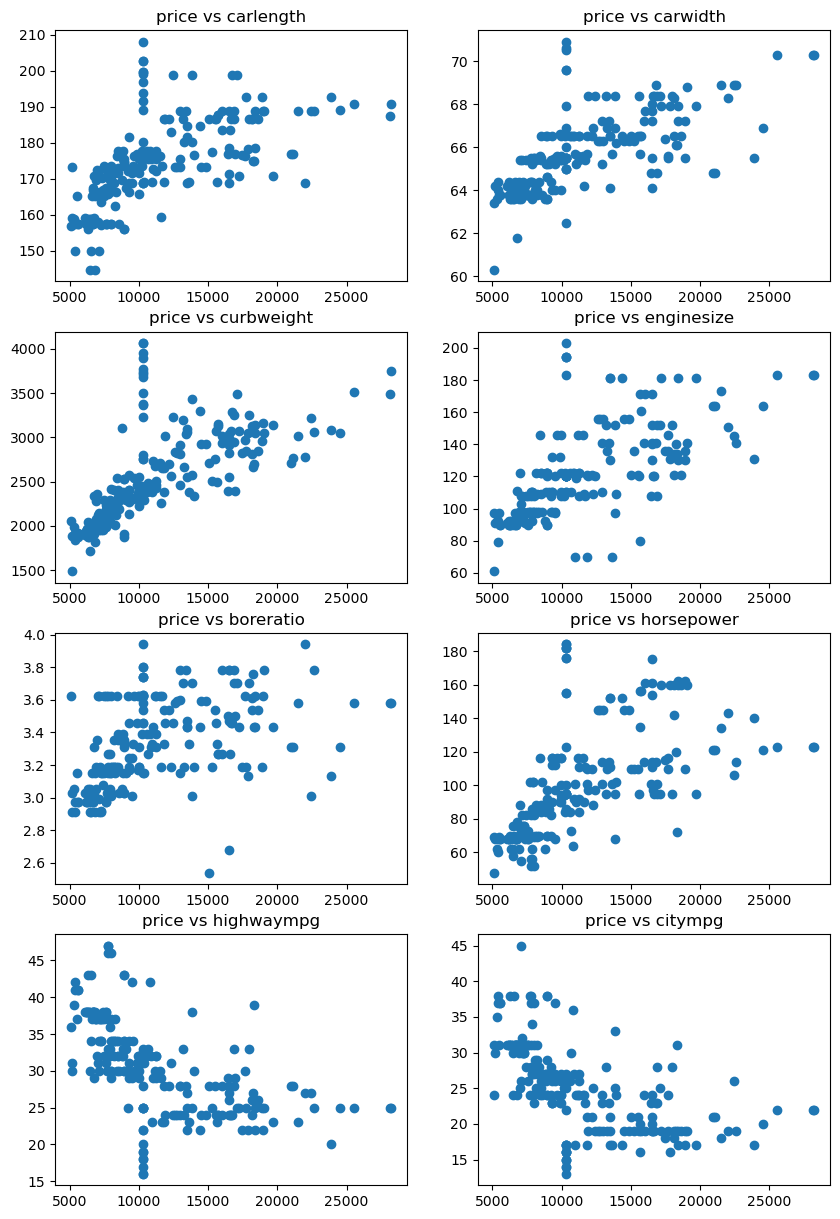

In [49]:
plt.figure(figsize=(10,15))
plt.subplot(4,2,1)
plt.scatter(x=car["price"],y=car["carlength"])
plt.title("price vs carlength")
plt.subplot(4,2,2)
plt.scatter(x=car["price"],y=car["carwidth"])
plt.title("price vs carwidth")
plt.subplot(4,2,3)
plt.scatter(x=car["price"],y=car["curbweight"])
plt.title("price vs curbweight")
plt.subplot(4,2,4)
plt.scatter(x=car["price"],y=car["enginesize"])
plt.title("price vs enginesize")
plt.subplot(4,2,5)
plt.scatter(x=car["price"],y=car["boreratio"])
plt.title("price vs boreratio")
plt.subplot(4,2,6)
plt.scatter(x=car["price"],y=car["horsepower"])
plt.title("price vs horsepower")
plt.subplot(4,2,7)
plt.scatter(x=car["price"],y=car["highwaympg"])
plt.title("price vs highwaympg")
plt.subplot(4,2,8)
plt.scatter(x=car["price"],y=car["citympg"])
plt.title("price vs citympg")

## Multivariate Analysis

- Two or more variables consider to find relation between them with the help of scatter plot, histogram
- pairplot is used to show the relationship between multiple variables

In [50]:
# sns.pairplot(car)

In [51]:
#sns.heatmap(car, annot=True)

### check uniques
- Checking unique values for categorical columns
- Carbrand 28 and carmodel 120 unique values which is the most

In [52]:
for i in car.columns:
    if car[i].dtype==object:
        print(i, " :",car[i].nunique())

fueltype  : 2
aspiration  : 2
doornumber  : 2
carbody  : 5
drivewheel  : 3
enginelocation  : 2
enginetype  : 7
cylindernumber  : 7
fuelsystem  : 8
carbrand  : 28
carmodel  : 120


- Check the shape of the data before applying get_dummies function

In [53]:
car.shape

(205, 25)

### convert categorical to numerical
- Using get dummies function to 

In [54]:
car=pd.get_dummies(car, drop_first=True)

In [55]:
car.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,carmodel_valiant,carmodel_versa,carmodel_x1,carmodel_x3,carmodel_x4,carmodel_x5,carmodel_xf,carmodel_xj,carmodel_xk,carmodel_z4
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,False,False,False,False,False,False,False,False,False,False
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,False,False,False,False,False,False,False,False,False,False
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,False,False,False,False,False,False,False,False,False,False
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,False,False,False,False,False,False,False,False,False,False
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,False,False,False,False,False,False,False,False,False,False


After converting all categorical columns to numerical values, the dataset now consists of 205 rows and 191 columns.

In [56]:
car.shape

(205, 189)

### Linear Regression Algorithm
- Now that we have a dataset with all numerical features, we can apply the Linear Regression algorithm. Linear regression is a supervised machine learning algorithm used to model the relationship between a dependent variable (target) and one or more independent variables (features).

- use sklearn library to import necessary moduls 
standardscaler is used for scaling independent variables 
train_test_split is used to split data into training and testing subsets.
this helps in evaluating the model performance on training it on one portion of the data and test on the other
test_size parameter specifies the portion of the data used for testing.
LinearRegression is used to apply simple or multiple regression algorithm.
    

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

- create a function for simple linear regression algorithm for training and testing

In [58]:
def simple_regression(data, column):
    input_variable=data[column].values.reshape(-1,1)
    output_variable=data["price"].values
    plt.figure(figsize=(6,6))
    sns.regplot(x=input_variable, y=output_variable);
    plt.show()
    
    scaler=StandardScaler()
    input_scaled=scaler.fit_transform(input_variable)
    input_train, input_test, output_train, output_test=train_test_split(input_scaled, output_variable, test_size=0.2,random_state=42)
    model=LinearRegression()
    model.fit(input_train, output_train)
    # for training
    output_train_predicted=model.predict(input_train)
    print(f'MSE TRAINING  {column} is :' ,mean_squared_error(output_train, output_train_predicted))
    print(f'r2 TRAINING {column} is :' , r2_score(output_train, output_train_predicted))
    print("*"*25)
    
    # for testing
    output_test_predicted=model.predict(input_test)
    print(f'MSE TESTING  {column} is :' ,mean_squared_error(output_test, output_test_predicted))
    print(f'r2 TESTING {column} is :' , r2_score(output_test, output_test_predicted))

- create a function for Ridge regression 
- Ridge regression is used when the model suffer multicolinearity or when data has more features than observations.

In [59]:
def ridge_regression(data, column):
    input_variable=data[column].values.reshape(-1,1)
    output_variable=data["price"].values
    scaler=StandardScaler()
    input_scaled=scaler.fit_transform(input_variable)
    input_train, input_test, output_train, output_test=train_test_split(input_scaled, output_variable, test_size=0.2,random_state=42)
    
    ridge_reg=Ridge()
    ridge_reg.fit(input_train, output_train)
    # for training
    y_pred_ridge_train=ridge_reg.predict(input_train)
    # for testing 
    y_pred_ridge_test=ridge_reg.predict(input_test)
    print(f' RIDGE regression TRAINING {column} :',ridge_reg.score(input_train, output_train))
    print("*"*25)
    print(f' RIDGE regression TESTING {column} :',ridge_reg.score(input_test, output_test))

- create a function for lasso regression
- Lasso is linear regression model used in case of overfitting.

In [60]:
def lasso_regression(data, column):
    input_variable=data[column].values.reshape(-1,1)
    output_variable=data["price"].values
    
    scaler=StandardScaler()
    input_scaled=scaler.fit_transform(input_variable)
    
    input_train, input_test, output_train, output_test=train_test_split(input_scaled, output_variable, test_size=0.2,random_state=42)
    
    lasso_reg=Lasso()
    lasso_reg.fit(input_train, output_train)
    # for training
    y_pred_lasso_train=lasso_reg.predict(input_train)
    # for testing 
    y_pred_lasso_test=lasso_reg.predict(input_test)
    print(f' LASSO regression TRAINING {column} :',lasso_reg.score(input_train, output_train))
    print("*"*25)
    print(f' LASSO regression TESTING {column} :',lasso_reg.score(input_test, output_test))

- create a function for elasticnet regression
- Elasticnet is linear regression model that combines both Lasso and Ridge regularization

In [61]:
def elasticnet_regression(data, column):
    input_variable=data[column].values.reshape(-1,1)
    output_variable=data["price"].values

    scaler=StandardScaler()
    input_scaled=scaler.fit_transform(input_variable)
    
    input_train, input_test, output_train, output_test=train_test_split(input_scaled, output_variable, test_size=0.2,random_state=42)
    
    elasticnet_reg=ElasticNet()
    elasticnet_reg.fit(input_train, output_train)
    # for training
    y_pred_elasticnet_train=elasticnet_reg.predict(input_train)
    # for testing 
    y_pred_elasticnet_test=elasticnet_reg.predict(input_test)
    print(f' ELASTICNET regression TRAINING {column} :',elasticnet_reg.score(input_train, output_train))
    print("*"*25)
    print(f' ELASTICNET regression TESTING {column} :',elasticnet_reg.score(input_test, output_test))

### Engine Size vs Price
- In simple linear regression, the R² score for the training set is 0.37, while for the testing set, it improves to 0.61.
- Ridge regression produces identical results, with a training R² score of 0.37 and a testing R² score of 0.61.
- Lasso regression also shows the same performance, with a training R² of 0.37 and a testing R² of 0.61.
- ElasticNet regression performs slightly worse, with a training R² score of 0.32 and a testing R² score of 0.47.

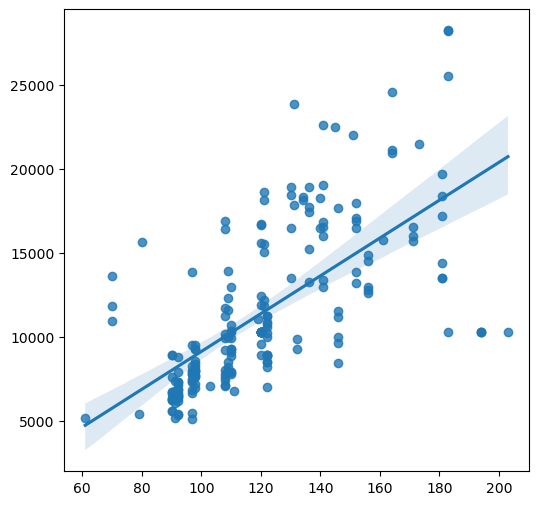

MSE TRAINING  enginesize is : 13046781.531906039
r2 TRAINING enginesize is : 0.3725675465294035
*************************
MSE TESTING  enginesize is : 11961814.800859634
r2 TESTING enginesize is : 0.6155345072740854
--------------------------------------------------
 RIDGE regression TRAINING enginesize : 0.3725525626700922
*************************
 RIDGE regression TESTING enginesize : 0.6135650139508593
--------------------------------------------------
 LASSO regression TRAINING enginesize : 0.37256749619328455
*************************
 LASSO regression TESTING enginesize : 0.6154210299873255
--------------------------------------------------
 ELASTICNET regression TRAINING enginesize : 0.3285640621073609
*************************
 ELASTICNET regression TESTING enginesize : 0.47319814800950855


In [62]:
simple_regression(car, "enginesize")
print("-"*50)
ridge_regression(car, "enginesize")
print("-"*50)
lasso_regression(car, "enginesize")
print("-"*50)
elasticnet_regression(car, "enginesize")

### Highway MPG vs Price
- In simple linear regression, the R² score for the training set is 0.36, while for the testing set, it is 0.27.
- In Ridge regression, both the training and testing R² scores are consistent at 0.36 and 0.27, respectively.
- Lasso regression shows similar results, with a training R² score of 0.36 and a testing R² score of 0.27.
- ElasticNet regression has slightly lower performance, with a training R² score of 0.32 and a testing R² score of 0.24.

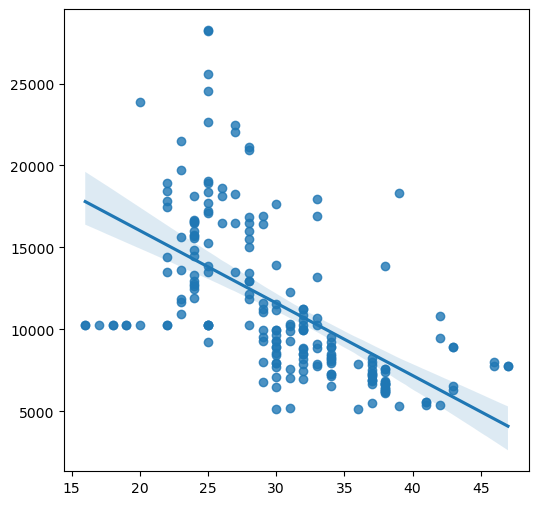

MSE TRAINING  highwaympg is : 13109466.697392847
r2 TRAINING highwaympg is : 0.3695529557599164
*************************
MSE TESTING  highwaympg is : 22546681.752925046
r2 TESTING highwaympg is : 0.27532558781550764
--------------------------------------------------
 RIDGE regression TRAINING highwaympg : 0.36953839969360125
*************************
 RIDGE regression TESTING highwaympg : 0.2754122508278287
--------------------------------------------------
 LASSO regression TRAINING highwaympg : 0.369552905948908
*************************
 LASSO regression TESTING highwaympg : 0.2753312890914461
--------------------------------------------------
 ELASTICNET regression TRAINING highwaympg : 0.3265031352745177
*************************
 ELASTICNET regression TESTING highwaympg : 0.24674246955066714


In [63]:
simple_regression(car, "highwaympg")
print("-"*50)
ridge_regression(car, "highwaympg")
print("-"*50)
lasso_regression(car, "highwaympg")
print("-"*50)
elasticnet_regression(car, "highwaympg")

## multiple regression
- Multiple regression is a method used to model the relationship between a dependent variable and two or more independent variables.

- Developing a function to perform multiple regression for both training and testing

In [64]:
def multiple_regression(data, target_column):
    x=data.drop(target_column, axis=1)
    y=data[target_column]

    scaler=StandardScaler()
    x_scaled=scaler.fit_transform(x)
    print(x_scaled.shape)
    
    x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0.2, random_state=40)
    
    model=LinearRegression()
    model.fit(x_train, y_train)
    # for training
    y_train_predicted=model.predict(x_train)
    
    print(f' MSE TRAINING ',mean_squared_error(y_train, y_train_predicted))
    print(f' R2 TRAINING ',r2_score(y_train, y_train_predicted))
    print()
    # for testing
    y_test_predicted=model.predict(x_test)
    
    print(f' MSE TESTING ',mean_squared_error(y_test, y_test_predicted))
    print(f' R2 TESTING ',r2_score(y_test, y_test_predicted))

- Developing a function to perform Lasso multiple regression for both training and testing.

In [65]:
def lasso_multiple_regression(data, column):
    input_variable=data.drop(column, axis=1)
    output_variable=data[column]
    
    scaler=StandardScaler()
    input_scaled=scaler.fit_transform(input_variable)
    
    input_train, input_test, output_train, output_test=train_test_split(input_scaled, output_variable, test_size=0.2,random_state=42)
    
    lasso_reg=Lasso()
    lasso_reg.fit(input_train, output_train)
    # for training
    y_pred_lasso_train=lasso_reg.predict(input_train)
    # for testing 
    y_pred_lasso_test=lasso_reg.predict(input_test)
    print(f' LASSO regression TRAINING {column} :',lasso_reg.score(input_train, output_train))
    print("*"*25)
    print(f' LASSO regression TESTING {column} :',lasso_reg.score(input_test, output_test))

- Developing a function to perform elasticnet multiple regression for both training and testing.

In [66]:
def elasticnet_multiple_regression(data, column):
    input_variable=data.drop(column, axis=1)
    output_variable=data[column]
    
    scaler=StandardScaler()
    input_scaled=scaler.fit_transform(input_variable)
    
    input_train, input_test, output_train, output_test=train_test_split(input_scaled, output_variable, test_size=0.2,random_state=42)
    
    elasticnet_reg=ElasticNet()
    elasticnet_reg.fit(input_train, output_train)
    # for training
    y_pred_elasticnet_train=elasticnet_reg.predict(input_train)
    # for testing 
    y_pred_elasticnet_test=elasticnet_reg.predict(input_test)
    print(f' ELASTICNET regression TRAINING {column} :',elasticnet_reg.score(input_train, output_train))
    print("*"*25)
    print(f' ELASTICNET regression TESTING {column} :',elasticnet_reg.score(input_test, output_test))

- Developing a function to perform ridge multiple regression for both training and testing.

In [67]:
def ridge_multiple_regression(data, column):
    input_variable=data.drop(column, axis=1)
    output_variable=data[column]
    
    scaler=StandardScaler()
    input_scaled=scaler.fit_transform(input_variable)
    
    input_train, input_test, output_train, output_test=train_test_split(input_scaled, output_variable, test_size=0.2,random_state=42)
    
    ridge_reg=Ridge()
    ridge_reg.fit(input_train, output_train)
    # for training
    y_pred_ridge_train=ridge_reg.predict(input_train)
    # for testing 
    y_pred_ridge_test=ridge_reg.predict(input_test)
    print(f' RIDGE regression TRAINING {column} :',ridge_reg.score(input_train, output_train))
    print("*"*25)
    print(f' RIDGE regression TESTING {column} :',ridge_reg.score(input_test, output_test))

- In multiple regression, the R² score is 0.99 for training, but it drops to -6.7 for testing, indicating potential overfitting.

- In Lasso regression, the R² score for training is 0.99, while the testing score is 0.55, showing a better balance between training and testing performance.

- ElasticNet regression yields an R² score of 0.94 for training and 0.51 for testing, demonstrating some level of overfitting, but still generalizing reasonably well.

- Ridge regression has a training R² score of 0.98, but its testing score is 0.46, reflecting a moderate level of overfitting.

In [68]:
multiple_regression(car, "price")
print("-"*50)
lasso_multiple_regression(car, "price")
print("-"*50)
elasticnet_multiple_regression(car, "price")
print("-"*50)
ridge_multiple_regression(car, "price")
print()

(205, 188)
 MSE TRAINING  287447.85906029877
 R2 TRAINING  0.9870859446179039

 MSE TESTING  7.982618932301365e+34
 R2 TESTING  -3.4058980454828793e+27
--------------------------------------------------
 LASSO regression TRAINING price : 0.9885037904489811
*************************
 LASSO regression TESTING price : 0.47389911304719057
--------------------------------------------------
 ELASTICNET regression TRAINING price : 0.9288517056270281
*************************
 ELASTICNET regression TESTING price : 0.529973077533309
--------------------------------------------------
 RIDGE regression TRAINING price : 0.984192923856714
*************************
 RIDGE regression TESTING price : 0.44414199696746914



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.965e+06, tolerance: 3.410e+05
  model = cd_fast.enet_coordinate_descent(


### Conclusion
- Based on the analysis and model prediction, it can be concluded that the features wheelbase, carlength, carwidth, curbweight, enginesize, horsepower, citympg, and highwaympg significantly impact the price of cars.
- These factors play a crucial role in determining the overall value, with larger and more powerful vehicles generally commanding higher prices.
- Additionally, the results indicate potential overfitting in the multiple regression model, as the R² score for training is 0.99, but the testing score is -6.7. In contrast, models like Lasso, ElasticNet, and Ridge show more balanced performance with Lasso achieving 0.99 for training and 0.55 for testing, ElasticNet yielding 0.94 for training and 0.51 for testing, and Ridge performing at 0.98 for training and 0.46 for testing.
-  These results suggest that regularization techniques help mitigate overfitting, improving generalization to new data.